Let's exploring some questions from the main part:


Basic part: short description about user

-  Q1: What is your age (# years)?
-  Q2: What is your gender?
-  Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
-  Q5: Select the title most similar to your current role (or most recent title if retired)
-  Q6: For how many years have you been writing code and/or programming?

Programming part: languages 
-  Q7: What programming languages do you use on a regular basis?


Instruments for DS: libs, frameworks and etc
-  Q13: Approximately how many times have you used a TPU (tensor processing unit)?
-  Q14: What data visualization libraries or tools do you use on a regular basis?
-  Q16: Which of the following machine learning frameworks do you use on a regular basis?

Methods: ML, DL, NLP
-  Q15: For how many years have you used machine learning methods?
-  Q17: Which of the following ML algorithms do you use on a regular basis?
-  Q18: Which categories of computer vision methods do you use on a regular basis?
-  Q19: Which of the following natural language processing (NLP) methods do you use on a regular basis?

Work:
-  Q20: What is the size of the company where you are employed?
-  Q22: Does your current employer incorporate machine learning methods into their business?
-  Q23: Select any activities that make up an important part of your role at work:
-  Q24: What is your current yearly compensation ( approximate USD)?

Education topics:
-  Q37: On which platforms have you begun or completed data science courses?
-  Q39: Who/what are your favorite media sources that report on data science topics?

In [67]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

# color palette for seaborn
cmap = sns.diverging_palette(240, 10, n=9)

sns.set_style(style="whitegrid")
sns.color_palette("light:#5A9", as_cmap=True)

import warnings
warnings.simplefilter(action='ignore')

In [65]:
Kaggle=pd.read_csv("kaggle_survey_2020_responses.csv")
Kaggle.drop([0],axis=0,inplace=True)
Kaggle['time'] = Kaggle['Time from Start to Finish (seconds)'].astype(int)
Kaggle.drop("Time from Start to Finish (seconds)",axis=1,inplace=True)
Kaggle['time'] = pd.to_datetime(Kaggle['time'], unit='s').dt.time
first_col=Kaggle.pop('time')
Kaggle.insert(0, 'time', first_col)
Kaggle.head(3)

,time,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23_Part_1,Q23_Part_2,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7,Q23_OTHER,Q24,Q25,Q26_A_Part_1,Q26_A_Part_2,Q26_A_Part_3,Q26_A_Part_4,Q26_A_Part_5,Q26_A_Part_6,Q26_A_Part_7,Q26_A_Part_8,Q26_A_Part_9,Q26_A_Part_10,Q26_A_Part_11,Q26_A_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28_A_Part_1,Q28_A_Part_2,Q28_A_Part_3,Q28_A_Part_4,Q28_A_Part_5,Q28_A_Part_6,Q28_A_Part_7,Q28_A_Part_8,Q28_A_Part_9,Q28_A_Part_10,Q28_A_OTHER,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_Part_5,Q29_A_Part_6,Q29_A_Part_7,Q29_A_Part_8,Q29_A_Part_9,Q29_A_Part_10,Q29_A_Part_11,Q29_A_Part_12,Q29_A_Part_13,Q29_A_Part_14,Q29_A_Part_15,Q29_A_Part_16,Q29_A_Part_17,Q29_A_OTHER,Q30,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_Part_10,Q31_A_Part_11,Q31_A_Part_12,Q31_A_Part_13,Q31_A_Part_14,Q31_A_OTHER,Q32,Q33_A_Part_1,Q33_A_Part_2,Q33_A_Part_3,Q33_A_Part_4,Q33_A_Part_5,Q33_A_Part_6,Q33_A_Part_7,Q33_A_OTHER,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_OTHER,Q35_A_Part_1,Q35_A_Part_2,Q35_A_Part_3,Q35_A_Part_4,Q35_A_Part_5,Q35_A_Part_6,Q35_A_Part_7,Q35_A_Part_8,Q35_A_Part_9,Q35_A_Part_10,Q35_A_OTHER,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,Q37_Part_1,Q37_Part_2,Q37_Part_3,Q37_Part_4,Q37_Part_5,Q37_Part_6,Q37_Part_7,Q37_Part_8,Q37_Part_9,Q37_Part_10,Q37_Part_11,Q37_OTHER,Q38,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER,Q26_B_Part_1,Q26_B_Part_2,Q26_B_Part_3,Q26_B_Part_4,Q26_B_Part_5,Q26_B_Part_6,Q26_B_Part_7,Q26_B_Part_8,Q26_B_Part_9,Q26_B_Part_10,Q26_B_Part_11,Q26_B_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q28_B_Part_1,Q28_B_Part_2,Q28_B_Part_3,Q28_B_Part_4,Q28_B_Part_5,Q28_B_Part_6,Q28_B_Part_7,Q28_B_Part_8,Q28_B_Part_9,Q28_B_Part_10,Q28_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_Part_5,Q29_B_Part_6,Q29_B_Part_7,Q29_B_Part_8,Q29_B_Part_9,Q29_B_Part_10,Q29_B_Part_11,Q29_B_Part_12,Q29_B_Part_13,Q29_B_Part_14,Q29_B_Part_15,Q29_B_Part_16,Q29_B_Part_17,Q29_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Par

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '25-29'),
  Text(1, 0, '22-24'),
  Text(2, 0, '18-21'),
  Text(3, 0, '30-34'),
  Text(4, 0, '35-39'),
  Text(5, 0, '40-44'),
  Text(6, 0, '45-49'),
  Text(7, 0, '50-54'),
  Text(8, 0, '55-59'),
  Text(9, 0, '60-69'),
  Text(10, 0, '70+')])

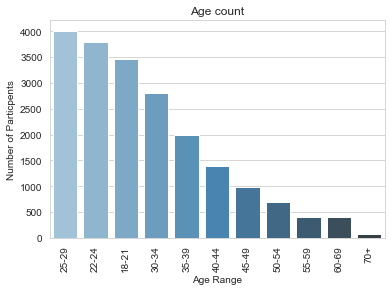

In [89]:
age=Kaggle.Q1.value_counts().sort_values(ascending=False).to_frame()
ax=sns.barplot(data=age,x=age.index,y='Q1',palette="Blues_d")
ax.set_title('Age count')
ax.set_xlabel('Age Range')
ax.set_ylabel('Number of Particpents')
plt.xticks(rotation=90)